In [148]:
import networkx as nx
import csv
import os
import math
import matplotlib.pyplot as plt

In [ ]:
'''
Finding essential genes:
1) DEG.annotations.txt and Core.tab.txt are starter files
2) Now extract all essential gene names from DEG.annotations.txt
3) Convert gene names to swiss prot IDs. Extract all swiss prot IDs from our network
4) Check which of the genes in yeast PIN are present in all essential genes to get essentail genes in the network.
'''

In [149]:
essential_swp=[]
with open ("Essential_SwissProt.txt") as fr:
    for line in fr:
        line = line.replace('\n','')
        essential_swp.append(line)

# print(essential_swp)
    

In [150]:
G=nx.read_gml('graphs/Core_swp.tab.gml')

In [151]:
G.nodes[str(0)]['pid']
nodes_es=[]
btwn_es=[]
deg_es=[]
for i in G.nodes():
    if(G.nodes[i]['pid'][4:] in essential_swp):
        nodes_es.append(i)
print(len(nodes_es))

923


In [152]:
btwn=nx.betweenness_centrality(graph,normalized = True)

# print(btwn)

In [153]:
res_full = [btwn.get(str(ele)) for ele in range(len(btwn))]
  
# printing result 
for i in range(len(res_full)):
    res_full[i]=math.ceil(res_full[i]*1000*(62/56)) #Normalize Betweeness Values
max(res_full)

61

In [154]:
res_es=[btwn.get(i) for i in nodes_es]
print(len(res_es))
for i in range(len(res_es)):
    res_es[i]=math.ceil(res_es[i]*1000*(62/56))

923


In [155]:
max(res_es)

61

In [156]:
freq_full=[res_full.count(i) for i in range(max(res_full)+1)]
for i in range(len(freq_full)):
    if(freq_full[i]==0):
        freq_full[i]+=1
# freq_full

In [157]:
freq_es=[res_es.count(i) for i in range(max(res_es)+1)]
# freq_es

In [158]:
# deg=graph.degree()
deg=nx.degree_histogram(G)

for i in range(len(deg)):
    if(deg[i]==0):
        deg[i]+=1
print(deg)

[1, 764, 424, 320, 210, 140, 130, 103, 79, 67, 49, 55, 36, 37, 27, 18, 20, 19, 20, 18, 7, 9, 8, 5, 3, 5, 5, 5, 2, 2, 3, 1, 5, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [159]:
deg_list=[]
degree_g=G.degree()
for i in nodes_es:
    deg_list.append(degree_g[i])

In [160]:
# max(deg_list)
deg_freq=[]
for i in range(max(deg_list)+1):
    deg_freq.append(deg_list.count(i))

In [161]:
percentage_connectivity=[(deg_freq[i]/deg[i]) * 100 for i in range(len(deg))]
# percentage_connectivity
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

percentage_connectivity=zero_to_nan(percentage_connectivity)

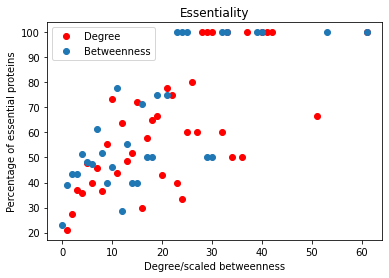

In [162]:
percentage_betweenness=[(freq_es[i]/freq_full[i]) * 100 for i in range(len(freq_full))]
percentage_betweenness=zero_to_nan(percentage_betweenness)
plt.plot(percentage_connectivity,'ro',label='Degree')
plt.plot(percentage_betweenness,'o',label='Betweenness')
plt.xlabel('Degree/scaled betweenness')
plt.ylabel('Percentage of essential proteins')
plt.title('Essentiality')
plt.legend()
plt.show()